# Filtración VR

In [1]:
import numpy as np
import pandas as pd

In [16]:
p = 2
epsilon = .01

In [13]:
data = np.genfromtxt("Filtracion VR.csv", delimiter=",")
data = data[:25]

import plotly.graph_objects as go
import numpy as np

layout = go.Layout(
    scene=dict(xaxis=dict(showbackground=False),
               yaxis=dict(showbackground=False),
               zaxis=dict(showbackground=False)),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

trace = go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], mode='markers',
                     marker=dict(color='black', size=4))

fig = go.Figure(data=[trace], layout=layout)

fig.show()

Es la pata del gato c:

In [4]:
def distance(point1, point2, p):
    return np.power(np.sum(np.power(np.abs(point1 - point2), p)), 1/p)

$$
\left( \sum_{i=1}^{n} |x_{i} - x_{j}|^p \right)^{\frac{1}{p}}
$$


In [5]:
def calculate_distance_matrix(dataset, p):
    distance_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            distance_matrix[i, j] = distance(dataset[i], dataset[j], p)
    return distance_matrix

In [6]:
distance_matrix = calculate_distance_matrix(data, p)

In [7]:
def vietoris_rips_filtration(distance_matrix, epsilon):
    n = distance_matrix.shape[0]
    complex = []

    def add_simplex(simplex, max_distance):
        complex.append(simplex)
        if len(simplex) < n:
            for i in range(max(simplex) + 1, n):
                new_distance = max(max_distance, distance_matrix[simplex[0], i])
                if new_distance <= epsilon:
                    add_simplex(simplex + [i], new_distance)

    for i in range(n):
        add_simplex([i], 0)

    return complex

In [17]:
complex = vietoris_rips_filtration(distance_matrix, epsilon)
print(f"Epsilon {epsilon}: {complex}")

Epsilon 0.01: [[0], [1], [2], [2, 8], [2, 8, 68], [2, 68], [3], [4], [5], [6], [7], [8], [8, 72], [9], [10], [11], [12], [13], [13, 14], [14], [15], [15, 16], [15, 16, 17], [15, 16, 17, 18], [15, 16, 18], [15, 17], [15, 17, 18], [15, 18], [16], [16, 17], [17], [17, 18], [18], [18, 65], [18, 65, 66], [18, 66], [19], [19, 22], [20], [20, 21], [21], [22], [23], [23, 24], [24], [25], [25, 26], [26], [27], [27, 28], [27, 28, 29], [27, 28, 29, 30], [27, 28, 29, 30, 37], [27, 28, 29, 30, 37, 39], [27, 28, 29, 30, 37, 39, 40], [27, 28, 29, 30, 37, 40], [27, 28, 29, 30, 39], [27, 28, 29, 30, 39, 40], [27, 28, 29, 30, 40], [27, 28, 29, 37], [27, 28, 29, 37, 39], [27, 28, 29, 37, 39, 40], [27, 28, 29, 37, 40], [27, 28, 29, 39], [27, 28, 29, 39, 40], [27, 28, 29, 40], [27, 28, 30], [27, 28, 30, 37], [27, 28, 30, 37, 39], [27, 28, 30, 37, 39, 40], [27, 28, 30, 37, 40], [27, 28, 30, 39], [27, 28, 30, 39, 40], [27, 28, 30, 40], [27, 28, 37], [27, 28, 37, 39], [27, 28, 37, 39, 40], [27, 28, 37, 40], [

# Números de Betti

In [22]:
import gudhi as gd

def betti_numbers(complex, k):
    st = gd.SimplexTree()

    for simplex in complex:
        st.insert(simplex)

    diag = st.persistence()

    betti_nums = [0]*(k+1)
    for dim, (birth, death) in diag:
        if dim <= k:
            betti_nums[dim] += 1

    return betti_nums

betti_nums = betti_numbers(complex=complex, k=2)
for i, betti in enumerate(betti_nums):
    print(f"Betti {i}:", betti)

Betti 0: 33
Betti 1: 5
Betti 2: 0


# Diagrama de persistencia

In [25]:
from ripser import ripser
import matplotlib.pyplot as plt
import numpy as np

def barcode_homology_persistence(data, title, dimension):
    result = ripser(data, maxdim=dimension)
    diagrams = result['dgms']
    plt.figure(figsize=(7, 7))
    plt.suptitle(title)
    dgm = diagrams[dimension]
    for j, pt in enumerate(dgm):
        death = pt[1] if np.isfinite(pt[1]) else np.max(dgm[np.isfinite(dgm[:, 1]), 1]) * 2
        plt.plot([pt[0], death], [j, j], '-o')  
    plt.tight_layout()
    plt.show()

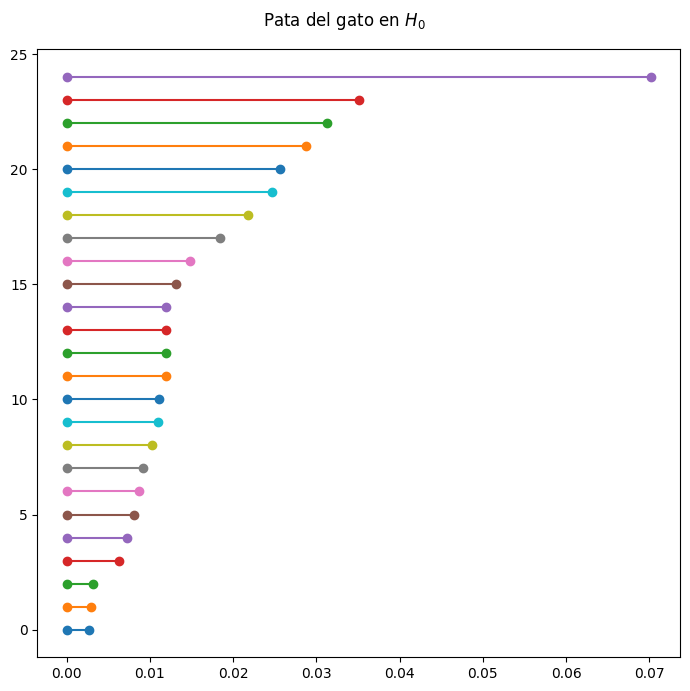

In [26]:
barcode_homology_persistence(data, "Pata del gato en $H_0$ ", 0)

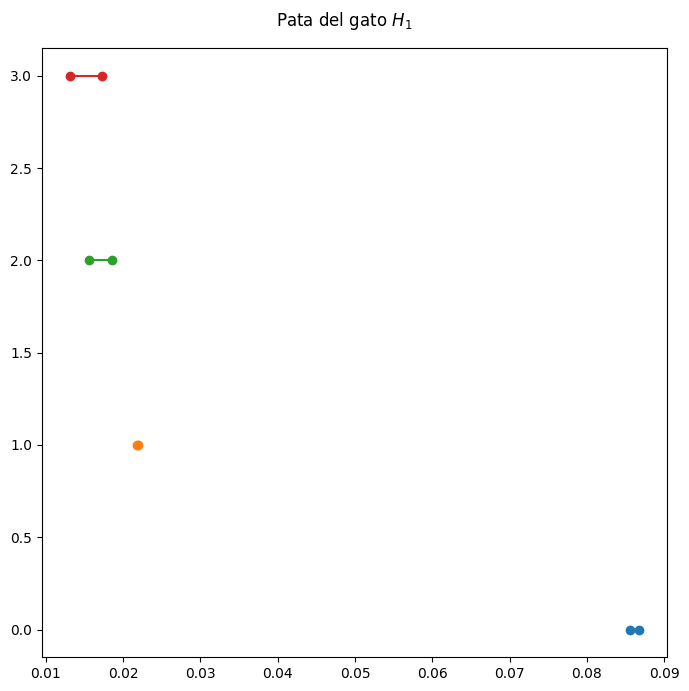

In [27]:
barcode_homology_persistence(data, "Pata del gato $H_1$ ", 1)

In [28]:
barcode_homology_persistence(data, "Pata del gato en $H_2$ ", 2)

<Figure size 700x700 with 0 Axes>